## Extraindo Estatísticas dos canais de cores e comparando imagens
***

Para o computador comparar duas imagens ainda sim é uma tarefa difícil, e para ajuda-lo nessa tarefa, convertemos a imagem em vetores de recurso e para isso vou utilizar um descritor de imagem.

O descritor de imagem mais simples é o cálculo da estatística, nós vamos olhar para os canais de cores de cada uma das imagens, vou converter essa característica em valores númericos obtendo um vetor de recursos de cada imagem. Então vou efetuar outro cálculo matemático (distância euclidiana) para comparar esses vetores de recurso.

***

In [1]:
# Estatísticas dos Canais de Cores
import numpy as np
import cv2
from scipy.spatial import distance as dist
from imutils import paths
from matplotlib import pyplot as plt

def show(img):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Obtém a lista de imagem e inicializa o índice para armazenar o nome
# do arquivo da imagem e o vetor de características
imagePaths = sorted(list(paths.list_images("imagens/elefantes")))
print(imagePaths)
index = {}

['imagens/elefantes/elefante01.jpg', 'imagens/elefantes/elefante02.jpg', 'imagens/elefantes/elefante03.jpg', 'imagens/elefantes/elefante04.jpg']


In [3]:
# Loop por todas as imagens
for imagePath in imagePaths:
    # Carrega a imagem e extrai o nome do arquivo
    image = cv2.imread(imagePath)
    filename = imagePath[imagePath.rfind("/") + 1:]

    # Extraia a média e desvio padrão de cada canal da imagem BGR, depois atualiza o
    # índice com o vetor de características
    (media, desvio) = cv2.meanStdDev(image)

    # Calculando as características
    features = np.concatenate([media, desvio]).flatten()
    index[filename] = features

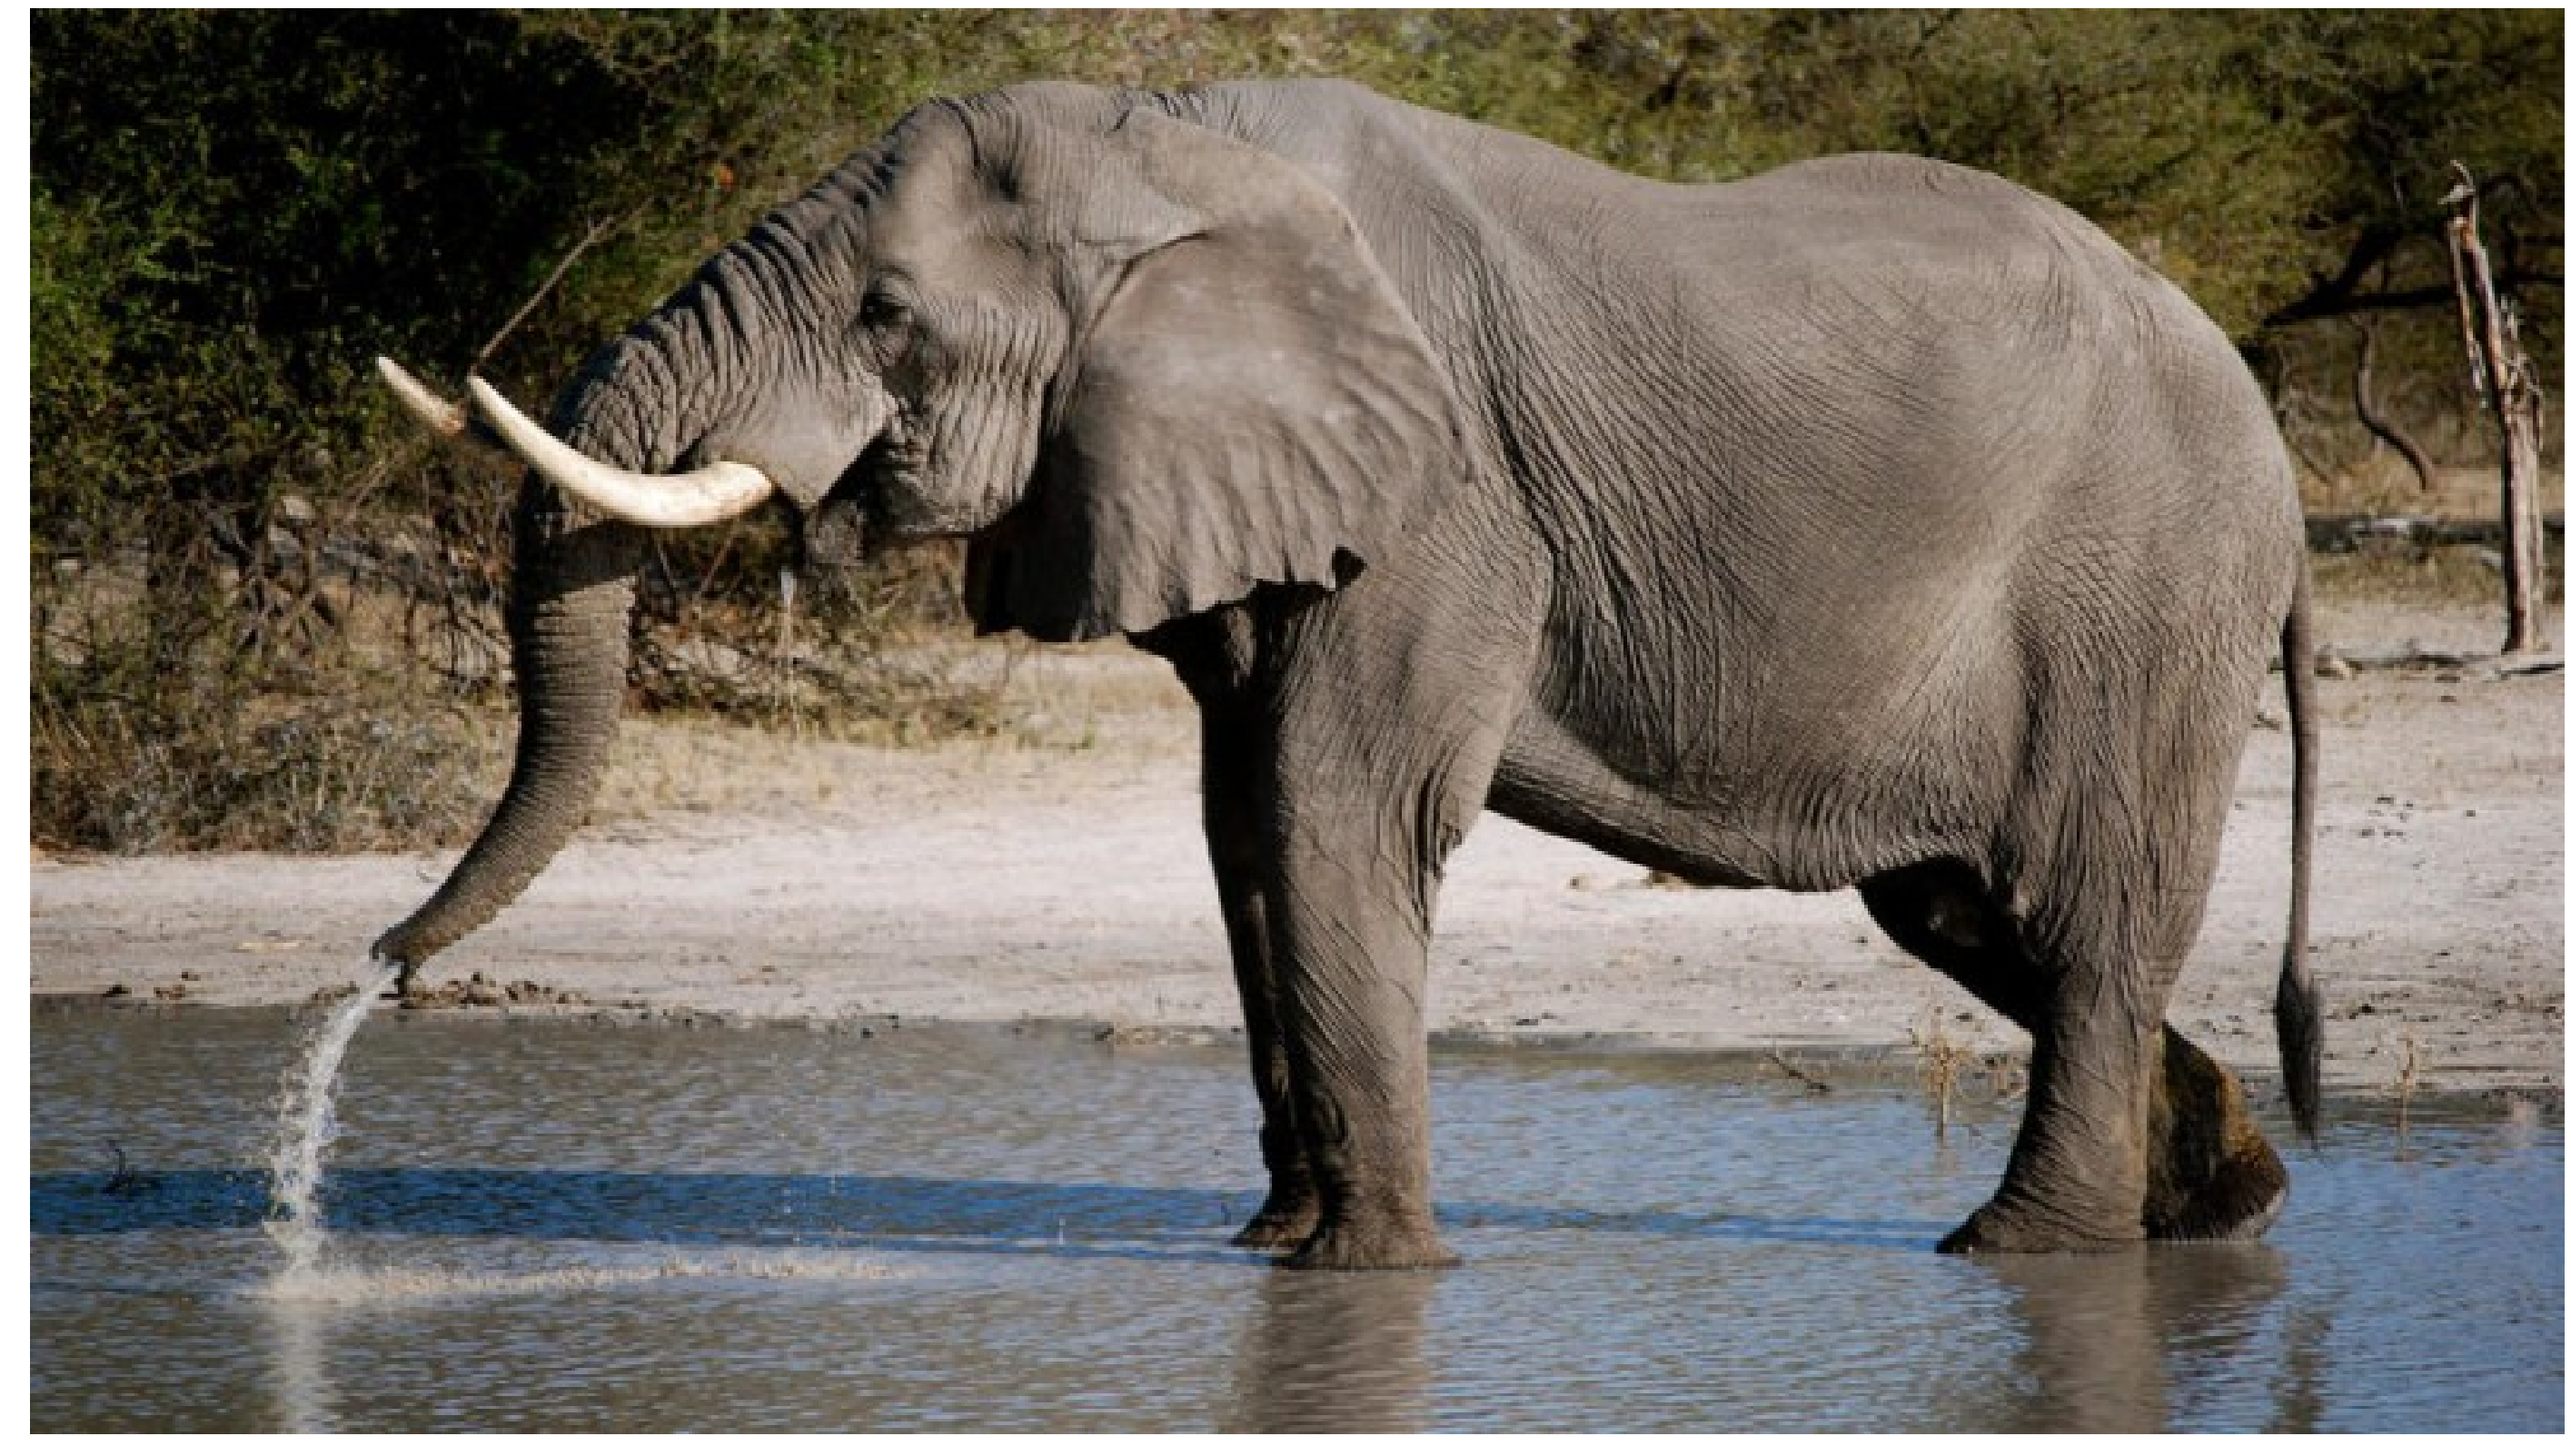

In [4]:
# Exibe a imagem da consulta (padrão) e obtém as chaves ordenadas do dicionário de índice
query = cv2.imread(imagePaths[0])
show(query)
keys = sorted(index.keys())

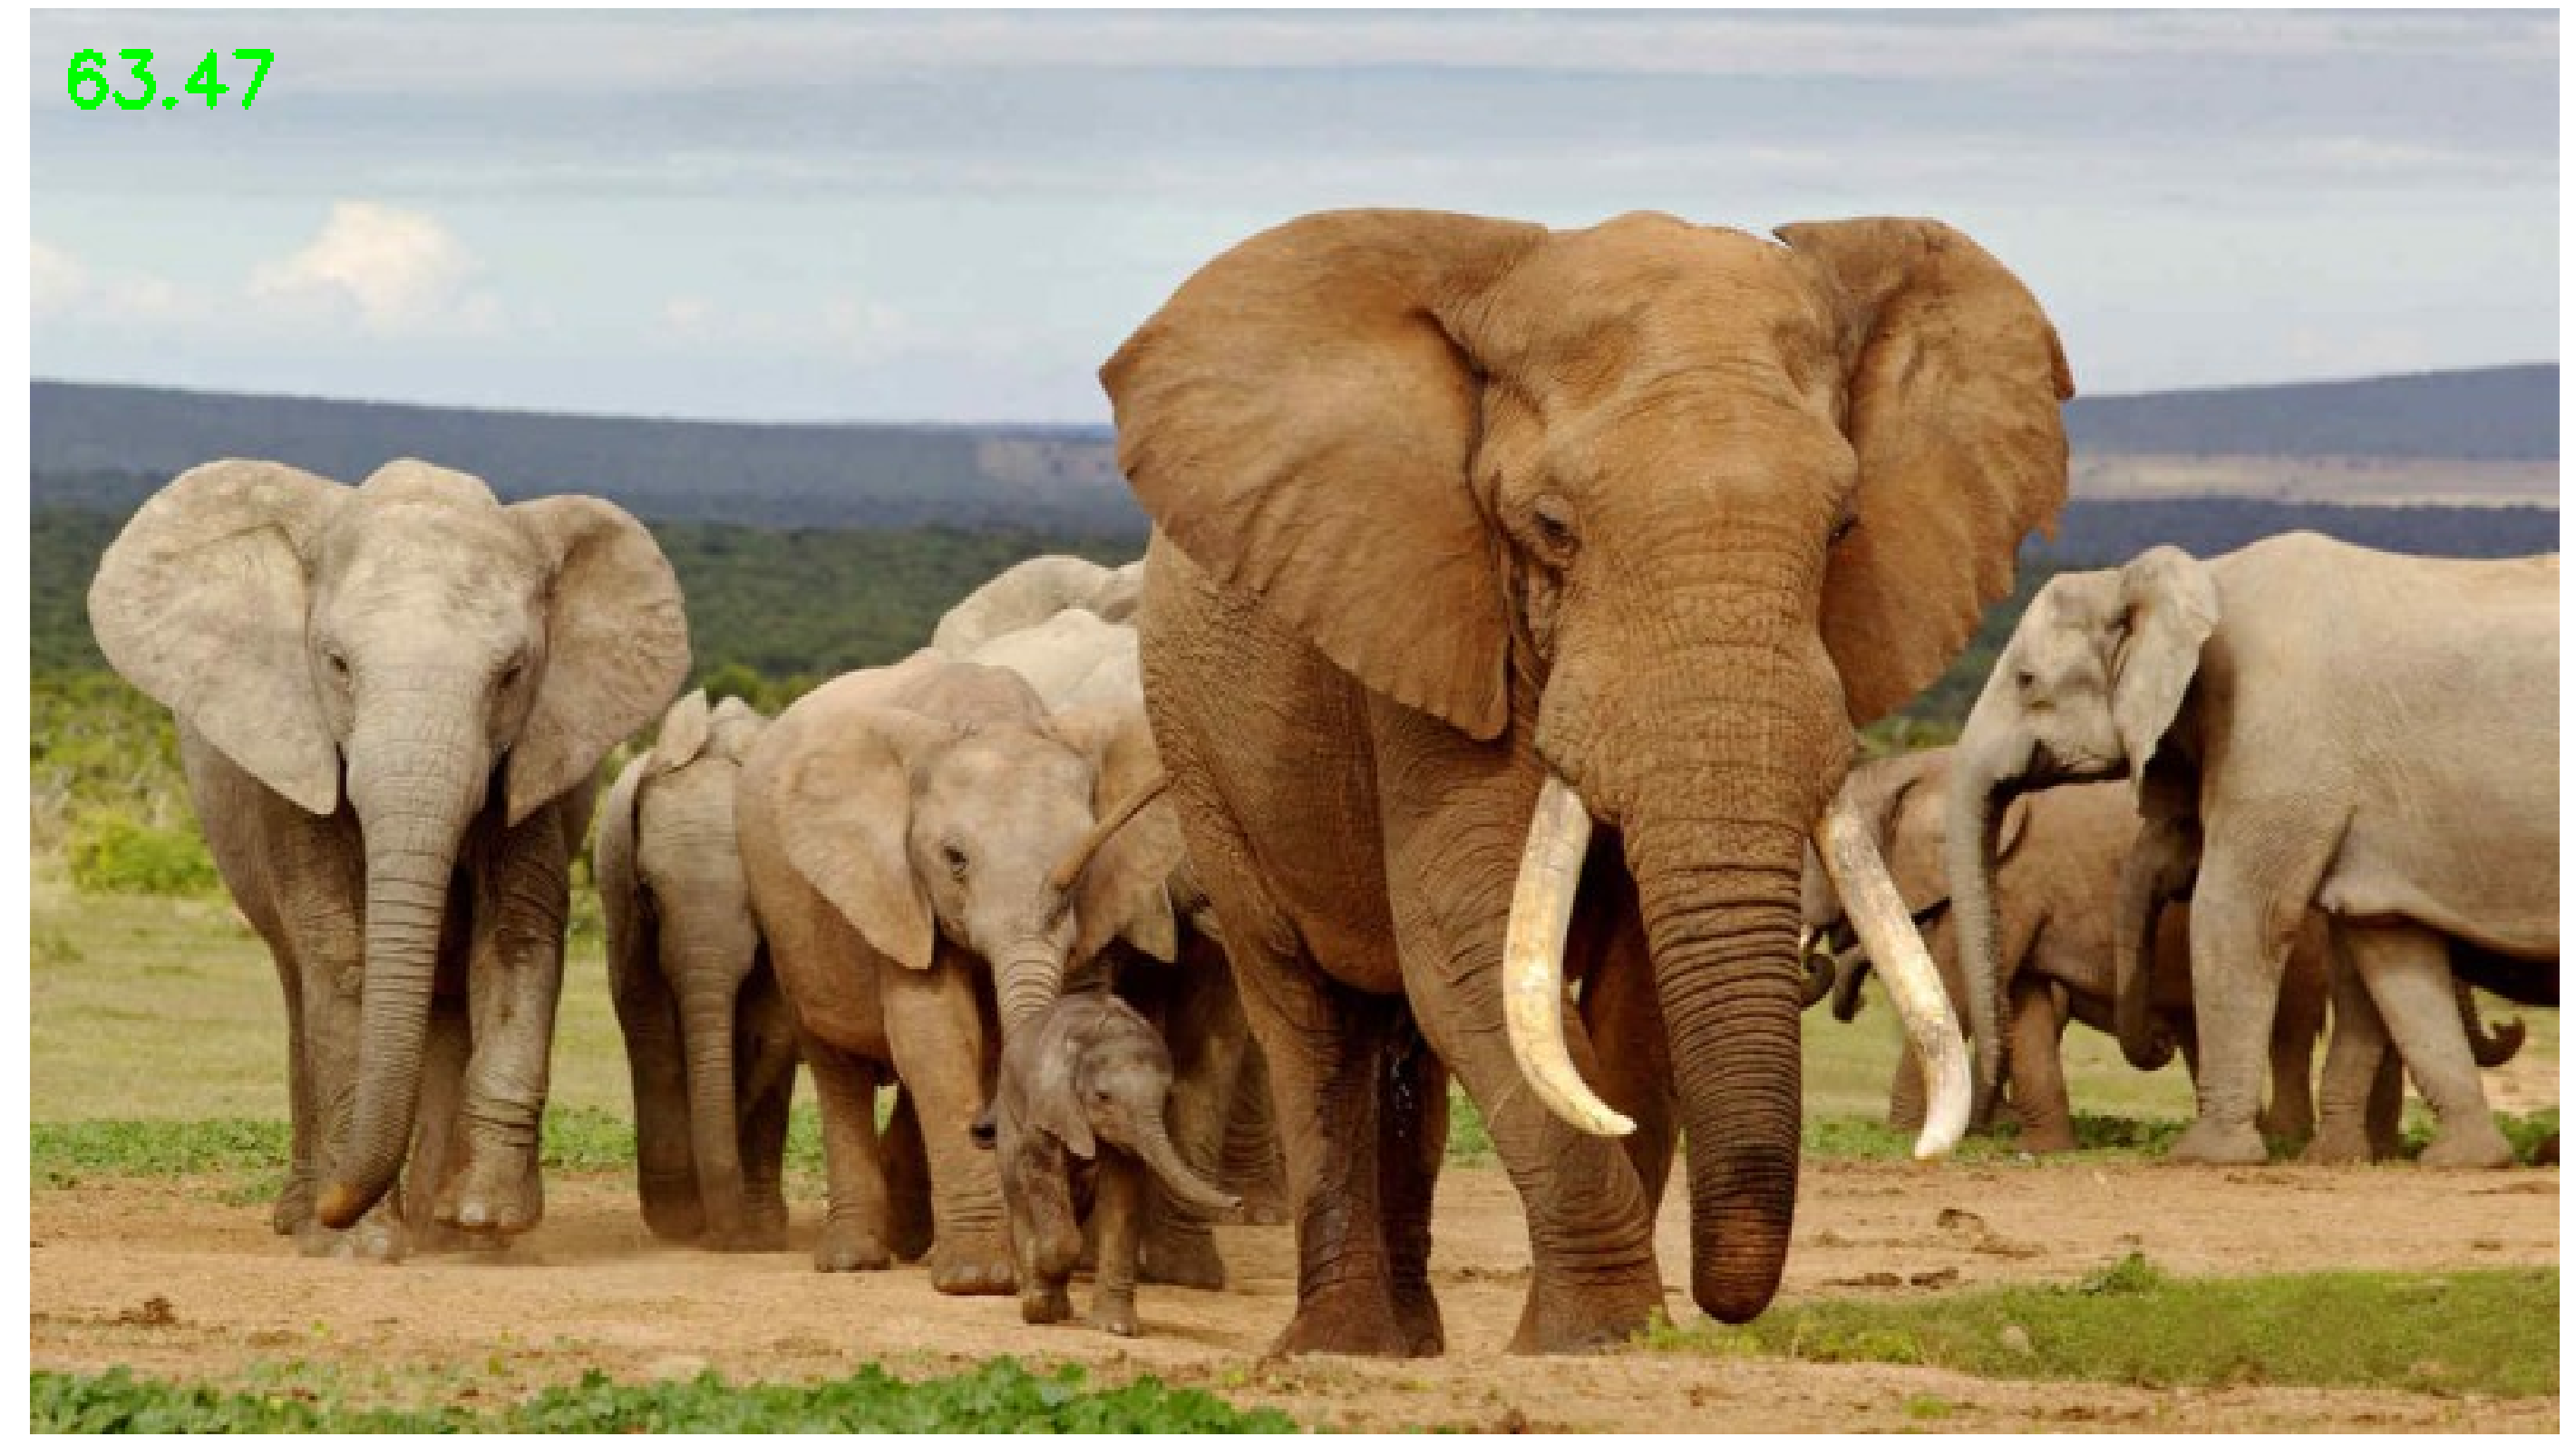

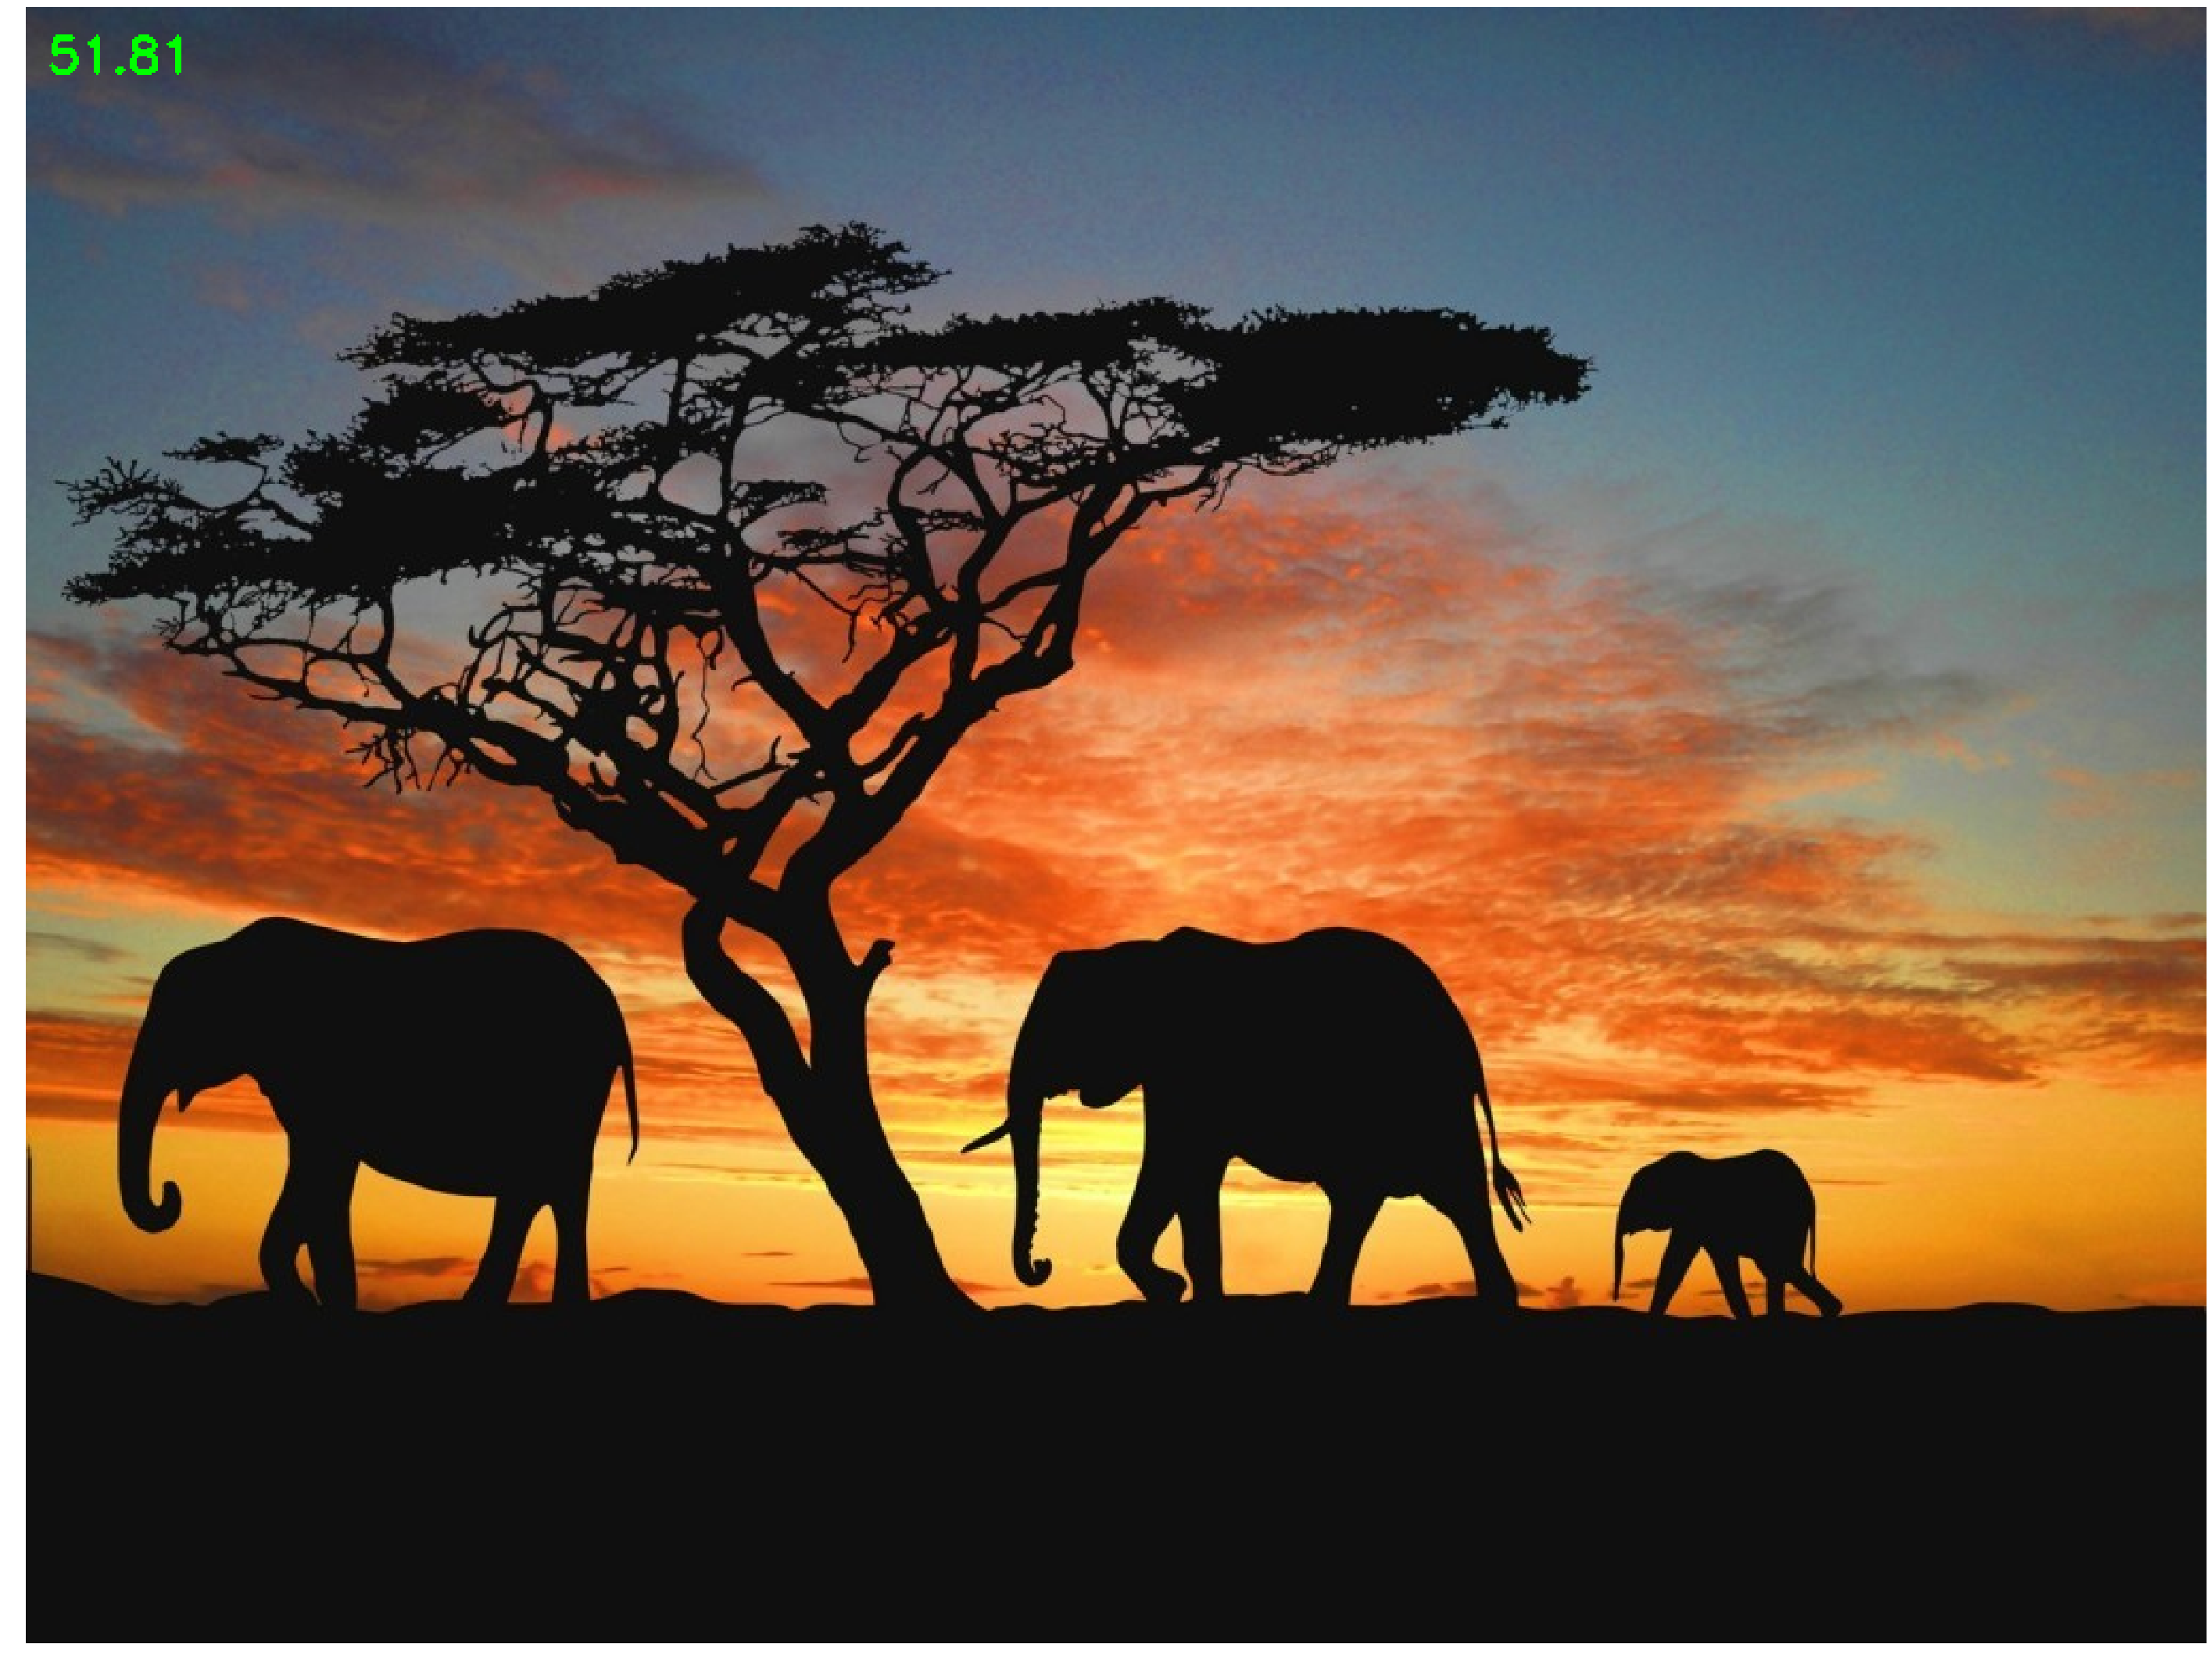

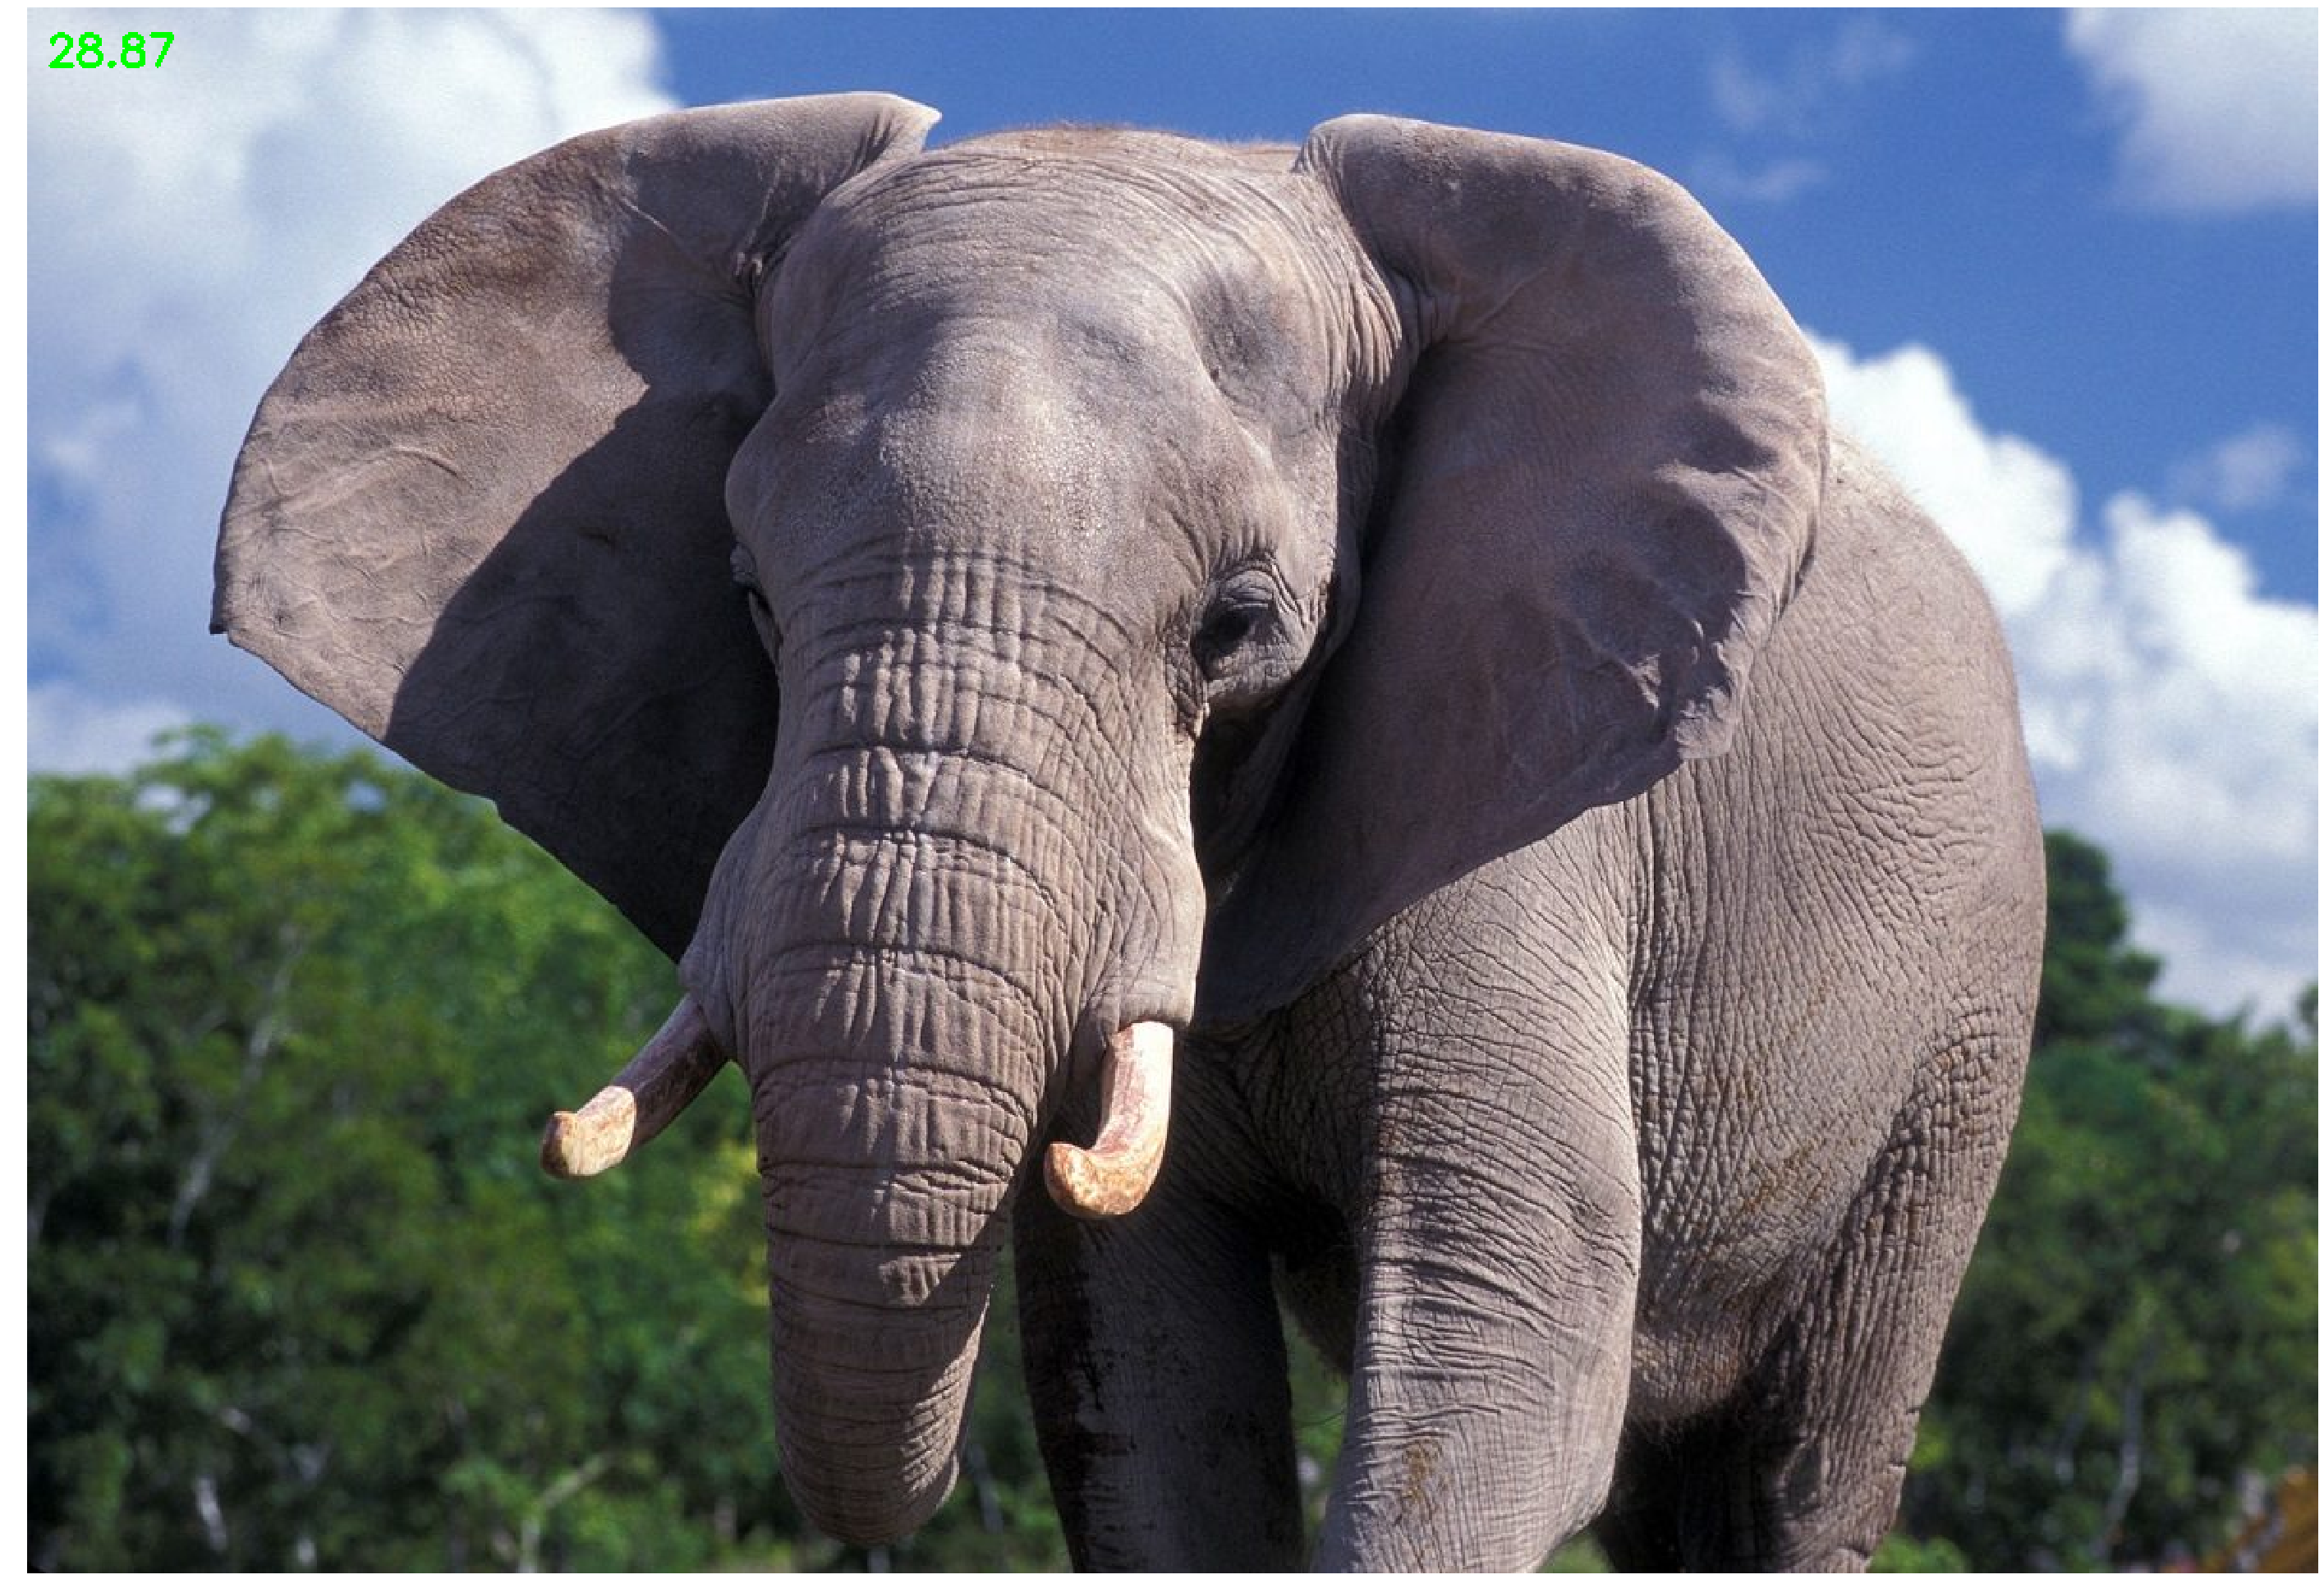

In [5]:
# Loop por todos os arquivos do dicionário
for (i, k) in enumerate(keys):
    # Se for a imagem query, ignora
    if k == "elefante01.jpg":
        continue

    # Carrega a imagem atual e calcula a distância euclidiana entre a imagem da
    # consulta (ou seja, a 1ª imagem) e a imagem atual
    image = cv2.imread(imagePaths[i])
    d = dist.euclidean(index["elefante01.jpg"], index[k])

    # Exibe a distância entre a imagem da consulta e a imagem atual
    cv2.putText(image, "%.2f" % (d), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
    show(image)

O número verde que aparece é a distância euclidiana entre a imagem padrão e as outras imagens, quanto maior o número mais a distância entre os vetores de recurso. Significa que as imagens são cada vez mais diferentes.

O critério para a comparação é a combinação de cores.